<a href="https://colab.research.google.com/github/vidyasagar982/new/blob/main/Audio_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING REQUIRED LIBRARIES

In [ ]:
pip install librosa

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import IPython.display as ipd

In [ ]:
pip install matplotlib

LOAD THE AUDIO FILE


In [ ]:
#Path to audio file
audio_path = "/content/Guitar_1.wav"

#Load audio
y, sr = librosa.load(audio_path,sr=None)

#play audio (optional)
ipd.Audio(audio_path)

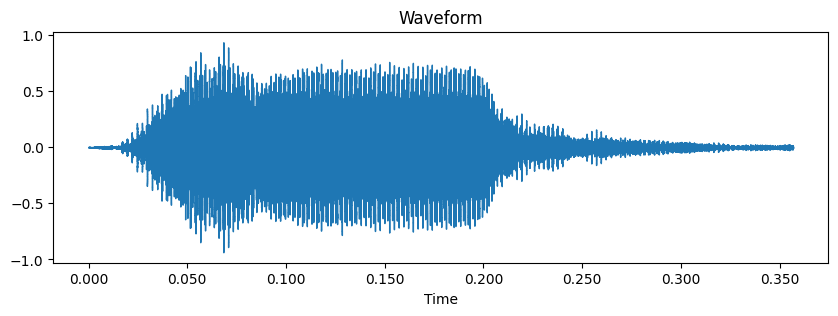

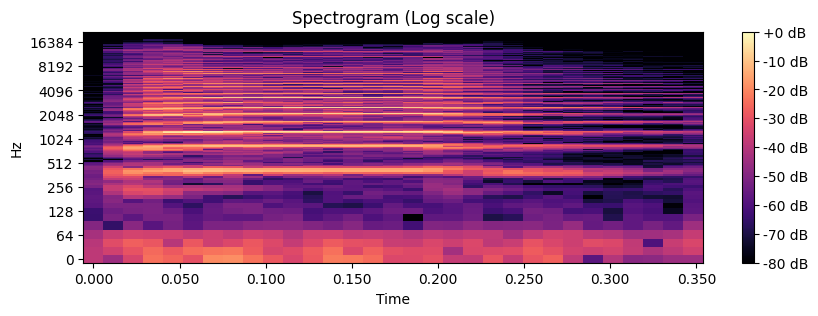

In [ ]:
#Plot waveform
plt.figure(figsize=(10,3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

#plot spectrogram
plt.figure(figsize=(10, 3))
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (Log scale)")
plt.show()

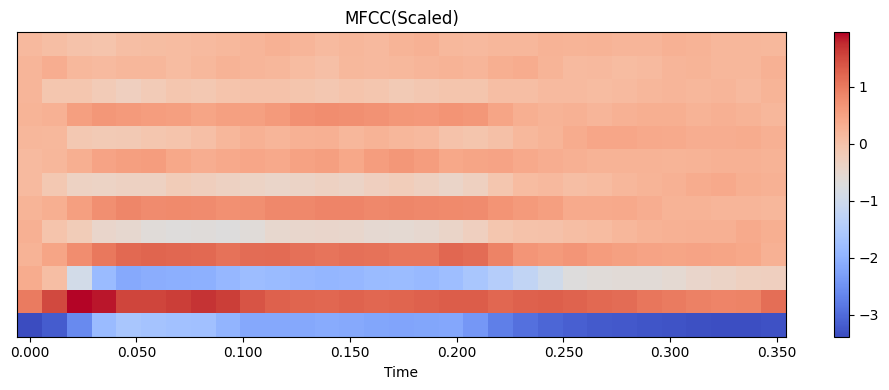

In [ ]:
mfcc=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfcc_scaled=StandardScaler().fit_transform(mfcc)

plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc_scaled, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC(Scaled)')
plt.tight_layout()
plt.show()

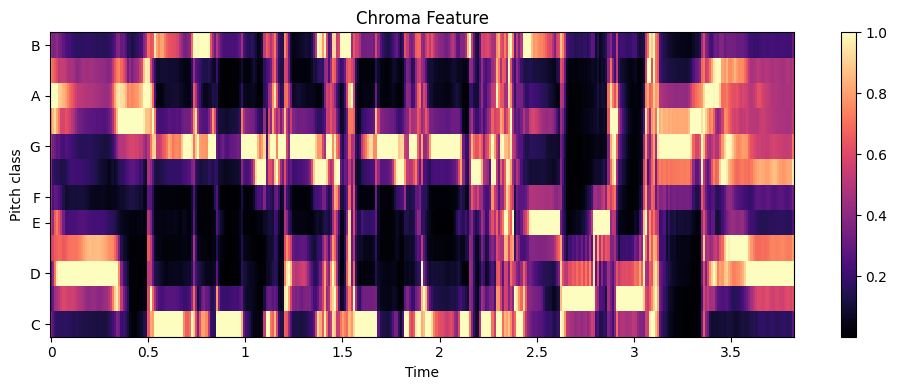

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()

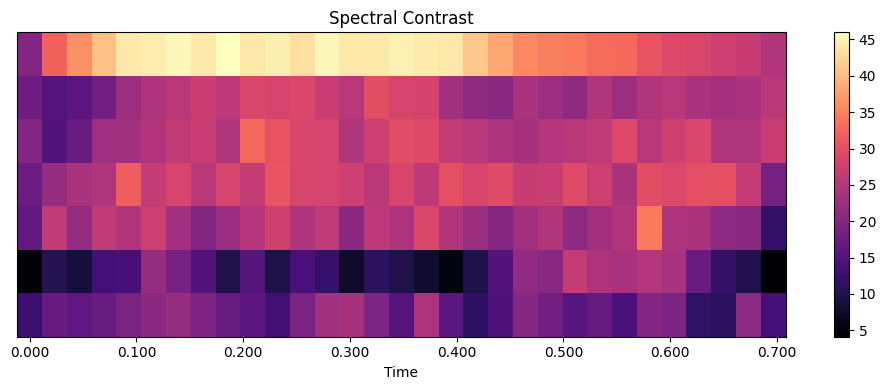

In [ ]:
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()

In [ ]:
# Extract features
mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

# Combine into a single feature vector
features = np.hstack([mfccs, chroma, contrast])
print("Feature vector shape:", features.shape)


Feature vector shape: (32,)


In [ ]:
# Wrap in DataFrame and save
feature_df = pd.DataFrame([features])
feature_df.to_csv("audio_features.csv", index=False)